In [19]:
import pandas as pd
import simplejson as json
import geopandas as gpd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

DATA_PATH = "data/seguridad"
RES_PATH = "res/"
DATA_PROCESSED_PATH = "data/processed/"
os.listdir(DATA_PATH)

['casos_penales_contravencionales_violencia_de_genero.csv',
 'comisarias.json',
 'tip_hab_modif_sexo__annio__g_edad__hab_modif_limpio.csv',
 'base-de-datos-2021-VG-DGVG.xlsx',
 'casos_penales_contrav_con_ind_violencia_genero.csv',
 'cantidad-de-dispositivos-antipanico.csv',
 'delitos_2021.csv',
 'comisarias-policia-de-la-ciudad.csv',
 'vict_fem_annio__g_edad_limpio.csv',
 'tas_femic_annio_limpio.csv']

# Load Geo Data

In [2]:
comunas = gpd.read_file(os.path.join(RES_PATH, "comunas-geojson.json"), driver='GeoJSON')
barrios = gpd.read_file(os.path.join(RES_PATH, "barrios-geojson.json"), driver="GeoJSON")

# Delitos

In [3]:
delitos = pd.read_csv(os.path.join(DATA_PATH, "delitos_2021.csv"), sep=";")
print(delitos.info())
delitos.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88567 entries, 0 to 88566
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id-mapa    88567 non-null  object 
 1   anio       88567 non-null  int64  
 2   mes        88567 non-null  object 
 3   dia        88567 non-null  object 
 4   fecha      88567 non-null  object 
 5   franja     88567 non-null  object 
 6   tipo       88567 non-null  object 
 7   subtipo    16321 non-null  object 
 8   uso_armas  8472 non-null   object 
 9   barrio     87390 non-null  object 
 10  comuna     87907 non-null  float64
 11  latitud    88567 non-null  object 
 12  longitud   88567 non-null  object 
 13  cantidad   7299 non-null   float64
dtypes: float64(2), int64(1), object(11)
memory usage: 9.5+ MB
None


,id-mapa,anio,mes,dia,fecha,franja,tipo,subtipo,uso_armas,barrio,comuna,latitud,longitud,cantidad
84874,RH-2021-3104317,2021,Septiembre,Jueves,02/09/2021,15,Robo (con violencia),NaN,NaN,San Telmo,1.0,"-34,623094","-58,373249",NaN
67838,RH-2021-1576792,2021,Noviembre,Martes,16/11/2021,9,Hurto (sin violencia),NaN,NaN,Agronomía,15.0,"-34,596839","-58,494813",NaN
5940,LC-2021-1560854,2021,Noviembre,Miércoles,10/11/2021,7,Lesiones,Siniestro Vial,NaN,Liniers,9.0,"-34,644606","-58,523095",4.0
2469,LC-2021-1198538,2021,Abril,Viernes,30/04/2021,10,Lesiones,Siniestro Vial,NaN,Boca,4.0,"-34,641332","-58,362674",1.0
27521,RH-2021-1177110,2021,Abril,Miércoles,14/04/2021,22,Robo (con violencia),NaN,NaN,Chacarita,15.0,"-34,588166","-58,450147",NaN


In [4]:
delitos.anio.value_counts()
delitos.mes.value_counts()
delitos.dia.value_counts()

delitos.dia = delitos.dia.str.lower() # homogenizo
delitos.dia.value_counts()

viernes      13776
martes       13487
miércoles    13455
jueves       13363
lunes        13266
sábado       11398
domingo       9822
Name: dia, dtype: int64

In [5]:
delitos.fecha = pd.to_datetime(delitos.fecha, format="%d/%m/%Y")

In [6]:
print("Data de Delitos incluye: {} a {}".format(delitos.fecha.min(), delitos.fecha.max()))

Data de Delitos incluye: 2021-01-01 00:00:00 a 2021-12-31 00:00:00


In [7]:
delitos.tipo.value_counts(dropna=False, normalize=True)

Robo (con violencia)     0.506114
Hurto (sin violencia)    0.411474
Lesiones                 0.080233
Homicidio                0.002179
Name: tipo, dtype: float64

In [8]:
delitos.latitud.str.replace(",", ".").value_counts(dropna=False, normalize=True)

delitos.latitud = delitos.latitud.str.replace(",", ".")
delitos.longitud = delitos.longitud.str.replace(",", ".")

In [9]:
delitos[(delitos.latitud == "SD") & (delitos.longitud == "SD")].shape, delitos[(delitos.latitud == "SD")].shape, delitos[(delitos.longitud == "SD")].shape
delitos = delitos[~((delitos.latitud == "SD") & (delitos.longitud == "SD"))]
delitos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87390 entries, 0 to 88566
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id-mapa    87390 non-null  object        
 1   anio       87390 non-null  int64         
 2   mes        87390 non-null  object        
 3   dia        87390 non-null  object        
 4   fecha      87390 non-null  datetime64[ns]
 5   franja     87390 non-null  object        
 6   tipo       87390 non-null  object        
 7   subtipo    15759 non-null  object        
 8   uso_armas  8398 non-null   object        
 9   barrio     87390 non-null  object        
 10  comuna     87390 non-null  float64       
 11  latitud    87390 non-null  object        
 12  longitud   87390 non-null  object        
 13  cantidad   6781 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 10.0+ MB


In [10]:
delitos.latitud = delitos.latitud.astype(float)
delitos.longitud = delitos.longitud.astype(float)

In [11]:
## convert to geopandas
delitos = gpd.GeoDataFrame(delitos, geometry=gpd.points_from_xy(delitos.longitud, delitos.latitud))

<Axes: xlabel='longitud', ylabel='latitud'>

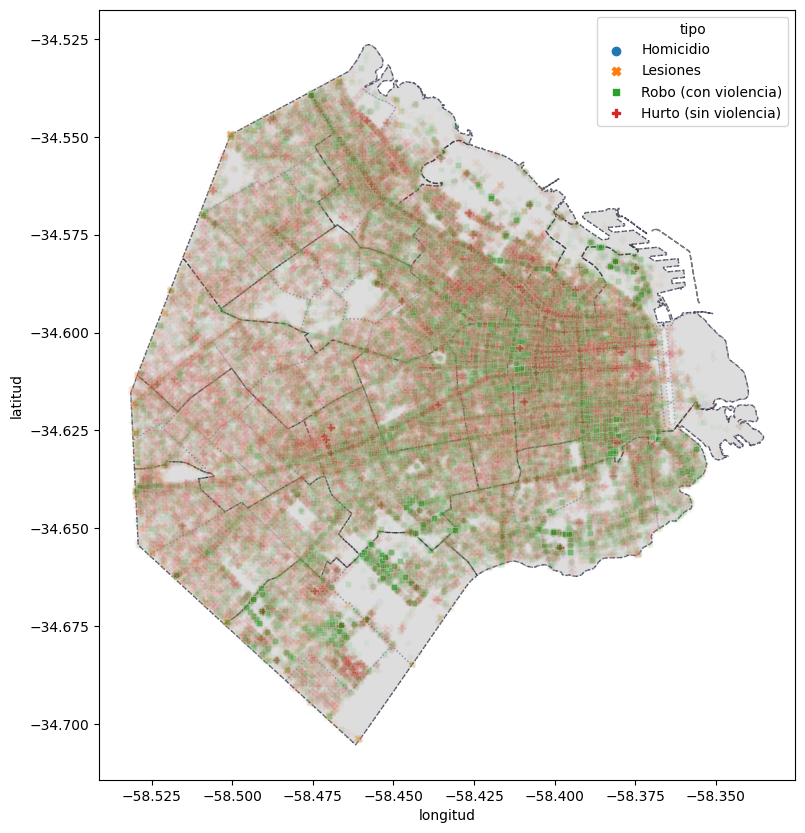

In [12]:
import seaborn as sns

fig, ax = plt.subplots(1,1, figsize=(10,10))

barrios.plot(ax=ax, color="lightgray", edgecolor="navy", linestyle="dotted", alpha=.5)
comunas.plot(ax=ax, color="lightgray", edgecolor="black", linestyle="--", alpha=.5)

sns.scatterplot(
    data=delitos,
    x="longitud",
    y="latitud",
    hue="tipo",
    alpha=.05,
    style="tipo"
)

In [13]:
delitos.subtipo.value_counts(dropna=False, normalize=True) # 80% nulos, dropping
delitos.uso_armas.value_counts(dropna=False, normalize=True) # 90% nulos, dropping
delitos.cantidad.value_counts(dropna=False, normalize=True) # 90% nulos, dropping

delitos.drop(columns=["subtipo", "uso_armas", "cantidad"], inplace=True)

In [14]:
delitos["id-mapa"].sample(10)

85093    RH-2021-3104707
41426    RH-2021-1325368
13410    RH-2021-1049005
69794    RH-2021-1591888
22832    RH-2021-1130663
51164    RH-2021-1431956
63373    RH-2021-1539511
83205    RH-2021-3101172
83714    RH-2021-3102148
25923    RH-2021-1162023
Name: id-mapa, dtype: object

In [15]:
delitos["id-mapa"].str.split("-").apply(lambda l: l[0]).value_counts(dropna=False) # asociado a tipo de delito

RH    80609
LC     6589
HD       98
HC       94
Name: id-mapa, dtype: int64

In [16]:
delitos.franja.value_counts(normalize=True, dropna=False).sort_index()
delitos.franja.replace({
    "SD": None,
    "sd": None
}, inplace=True)
delitos.franja = delitos.franja.astype(float)

In [17]:
delitos.sample(5)

,id-mapa,anio,mes,dia,fecha,franja,tipo,barrio,comuna,latitud,longitud,geometry
50400,RH-2021-1425854,2021,Agosto,viernes,2021-08-27,18.0,Hurto (sin violencia),Belgrano,13.0,-34.567036,-58.469633,POINT (-58.46963 -34.56704)
22893,RH-2021-1131248,2021,Marzo,lunes,2021-03-22,16.0,Hurto (sin violencia),Villa Urquiza,12.0,-34.573947,-58.498597,POINT (-58.49860 -34.57395)
13355,RH-2021-1048591,2021,Febrero,martes,2021-02-02,19.0,Robo (con violencia),Palermo,14.0,-34.588825,-58.410582,POINT (-58.41058 -34.58882)
32582,RH-2021-1224887,2021,Mayo,lunes,2021-05-17,6.0,Hurto (sin violencia),Villa Gral. Mitre,11.0,-34.606371,-58.461709,POINT (-58.46171 -34.60637)
76865,RH-2021-1646946,2021,Diciembre,lunes,2021-12-27,13.0,Hurto (sin violencia),Chacarita,15.0,-34.585701,-58.449895,POINT (-58.44989 -34.58570)


In [18]:
delitos.drop(columns=["anio", "mes", "dia"], inplace=True) # cleaning redundant columns

In [19]:
delitos.to_csv(os.path.join(DATA_PROCESSED_PATH, "delitos-2021.csv"), index=False)

# Violencia de Género 

In [20]:
os.listdir(DATA_PATH)

violencia_de_genero = pd.read_csv(os.path.join(DATA_PATH, "casos_penales_contravencionales_violencia_de_genero.csv"), 
                                  encoding="latin-1")
indice_violencia_de_genero = pd.read_csv(os.path.join(DATA_PATH, "casos_penales_contrav_con_ind_violencia_genero.csv"),
                                         encoding="latin-1")

## Casos Penales & Índice Violencia de Género

In [21]:
violencia_de_genero.sample()

,Año,Cuatrimestre,Tipo,Total,Sin indicadores de violencia de género y/o violencia doméstica,Con indicadores de violencia de género y/o violencia doméstica,Unnamed: 6,Unnamed: 7,Unnamed: 8
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
violencia_de_genero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 9 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Año                                                             8 non-null      float64
 1   Cuatrimestre                                                    8 non-null      float64
 2   Tipo                                                            8 non-null      object 
 3   Total                                                           8 non-null      object 
 4   Sin indicadores de violencia de género y/o violencia doméstica  8 non-null      object 
 5   Con indicadores de violencia de género y/o violencia doméstica  8 non-null      object 
 6   Unnamed: 6                                                      0 non-null      float64
 7   Unnamed: 7                                              

In [23]:
violencia_de_genero.Total.str.replace(",", "")\
    .astype(float)

0     27947.0
1     28786.0
2     31836.0
3     20403.0
4     20698.0
5     23316.0
6     25558.0
7     18166.0
8         NaN
9         NaN
10        NaN
Name: Total, dtype: float64

In [24]:
indice_violencia_de_genero

,Lugar,Año,Comuna,Casos penales,Casos contravencionales,Unnamed: 5,Unnamed: 6
0,CABA,2020.0,Total,"5,148","2,911",NaN,NaN
1,CABA,2020.0,1,514,299,NaN,NaN
2,CABA,2020.0,2,129,109,NaN,NaN
3,CABA,2020.0,3,301,199,NaN,NaN
4,CABA,2020.0,4,771,366,NaN,NaN
5,CABA,2020.0,5,232,133,NaN,NaN
6,CABA,2020.0,6,163,138,NaN,=
7,CABA,2020.0,7,516,245,NaN,NaN
8,CABA,2020.0,8,562,222,NaN,NaN
9,CABA,2020.0,9,447,163,NaN,NaN


## BD Mapa de Violencia de Género

In [25]:
os.listdir(DATA_PATH)
mapa_vdg = pd.read_excel(os.path.join(DATA_PATH, "base-de-datos-2021-VG-DGVG.xlsx"))
mapa_vdg.sample(5)

,JUSTICIA SOLICITANTE,COMUNA,TIPIFICACION,MODALIDAD
545,NACION,10,"DILIGENCIA JUDICIAL, PROTECCION DE PERSONA",Consigna Fija
284,CIUDAD,4,"VIOLENCIA DE GENERO, VIOLENCIA FAMILIAR",Consigna Dinámica
1205,CIUDAD,7,"DILIGENCIA JUDICIAL, PROTECCION DE PERSONA",Consigna Dinámica
199,CIUDAD,10,"VIOLENCIA DE GENERO, VIOLENCIA FAMILIAR",Consigna Fija
849,CIUDAD,8,"DILIGENCIA JUDICIAL, PROTECCION DE PERSONA",Consigna Dinámica


In [26]:
mapa_vdg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   JUSTICIA SOLICITANTE  1450 non-null   object
 1   COMUNA                1450 non-null   int64 
 2   TIPIFICACION          1450 non-null   object
 3   MODALIDAD             1450 non-null   object
dtypes: int64(1), object(3)
memory usage: 45.4+ KB


In [27]:
mapa_vdg.rename(mapper= lambda s: s.lower().replace(" ", "_"), axis=1, inplace=True)

In [28]:
mapa_vdg.justicia_solicitante.value_counts(dropna=False, normalize=True)

CIUDAD              0.664138
NACION              0.329655
JUSTICIA FEDERAL    0.004828
PROVINCIA           0.001379
Name: justicia_solicitante, dtype: float64

<Axes: title={'center': 'Cantidad de Denuncias por Comuna'}, ylabel='Comuna'>

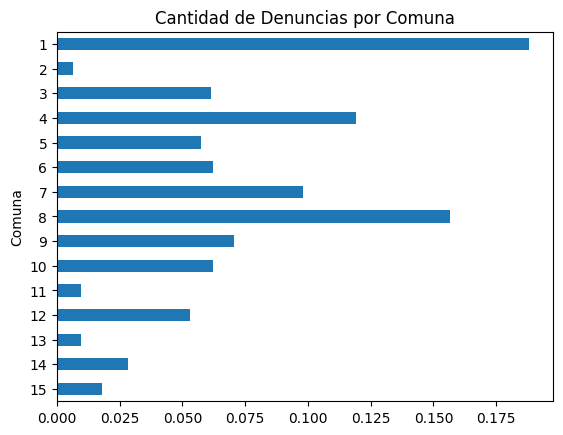

In [29]:
mapa_vdg.comuna.value_counts(dropna=False, normalize=True)\
    .sort_index(ascending=False)\
    .plot(kind="barh", title="Cantidad de Denuncias por Comuna", ylabel="Comuna")

In [30]:
mapa_vdg = mapa_vdg.merge(comunas[["COMUNAS", "geometry"]], left_on="comuna", right_on="COMUNAS") ## add geometries for plotting
mapa_vdg = gpd.GeoDataFrame(mapa_vdg, geometry="geometry")

In [31]:
mapa_vdg.sample(5)

,justicia_solicitante,comuna,tipificacion,modalidad,COMUNAS,geometry
710,NACION,12,"DILIGENCIA JUDICIAL, PROTECCION DE PERSONA",Consigna Fija,12.0,"MULTIPOLYGON (((-58.50331 -34.59386, -58.50347..."
1171,CIUDAD,9,"VIOLENCIA DE GENERO, VIOLENCIA FAMILIAR",Consigna Dinámica,9.0,"MULTIPOLYGON (((-58.50252 -34.67451, -58.50253..."
907,NACION,8,"VIOLENCIA DE GENERO, VIOLENCIA FAMILIAR",Consigna Fija,8.0,"MULTIPOLYGON (((-58.46040 -34.65681, -58.46040..."
536,CIUDAD,1,"DILIGENCIA JUDICIAL, PROTECCION DE PERSONA",Consigna Dinámica,1.0,"MULTIPOLYGON (((-58.36854 -34.57365, -58.36852..."
1132,CIUDAD,9,"VIOLENCIA DE GENERO, VIOLENCIA FAMILIAR",Consigna Fija,9.0,"MULTIPOLYGON (((-58.50252 -34.67451, -58.50253..."


In [32]:
mapa_vdg.tipificacion.value_counts(dropna=False, normalize=True)

VIOLENCIA DE GENERO, VIOLENCIA FAMILIAR         0.337241
DILIGENCIA JUDICIAL, PROTECCION DE PERSONA      0.327586
AMENAZAS: SIMPLES, AGRAVADAS, COACTIVAS         0.120690
LESIONES                                        0.051034
AQUELLOS NO INCLUIDOS EN LAS DEMAS CATEGRIAS    0.042759
ABUSO SEXUAL                                    0.025517
HOSTIGAMIENTO                                   0.015862
USURPACION                                      0.013103
ARRESTO DOMICILIARIO                            0.009655
SUICIDIO, TENTATIVA DE SUICIDIO                 0.008966
MUERTE POR CAUSA DUDOSA                         0.008276
AVERIGUACION ILICITO                            0.006897
DAÑO                                            0.005517
PROTECCION DE MENOR                             0.005517
HOMICIDIO, TENTATIVA DE HOMICIDIO               0.004828
ROBO                                            0.003448
PRIVACION ILEGITIMA DE LA LIBERTAD              0.003448
CLAUSURA                       

In [33]:
mapa_vdg.drop(columns=["COMUNAS"], inplace=True)

In [34]:
mapa_vdg.info() # no null values post-merge

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1450 entries, 0 to 1449
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   justicia_solicitante  1450 non-null   object  
 1   comuna                1450 non-null   int64   
 2   tipificacion          1450 non-null   object  
 3   modalidad             1450 non-null   object  
 4   geometry              1450 non-null   geometry
dtypes: geometry(1), int64(1), object(3)
memory usage: 68.0+ KB


In [35]:
mapa_vdg.tipificacion.unique()

array(['VIOLENCIA DE GENERO, VIOLENCIA FAMILIAR',
       'DILIGENCIA JUDICIAL, PROTECCION DE PERSONA',
       'AMENAZAS: SIMPLES, AGRAVADAS, COACTIVAS', 'USURPACION',
       'LESIONES', 'AQUELLOS NO INCLUIDOS EN LAS DEMAS CATEGRIAS',
       'ARRESTO DOMICILIARIO', 'DAÑO', 'ABUSO SEXUAL',
       'AVERIGUACION ILICITO', 'PROTECCION DE MENOR',
       'PRIVACION ILEGITIMA DE LA LIBERTAD', 'HOSTIGAMIENTO',
       'LEY DE DROGAS', 'MUERTE POR CAUSA DUDOSA',
       'SUICIDIO, TENTATIVA DE SUICIDIO', 'CLAUSURA',
       'AVERIGUACION DE INCENDIO', 'ALLANAMIENTO',
       'HOMICIDIO, TENTATIVA DE HOMICIDIO', 'ROBO',
       'DISPARO DE ARMA DE FUEGO', 'TRATA DE PERSONA'], dtype=object)

In [36]:
# Para reducir granularidad en la definicion de los tipos, vamos a agrupar los tipos minoritarios, esto deberia ayudar a visualizar mejor los datos.
agg_tipificacion = mapa_vdg.groupby(["tipificacion", "comuna"]).size()\
    .unstack().fillna(0).astype(int)

agg_tipificacion = (agg_tipificacion / agg_tipificacion.sum(axis=0)).round(4)
agg_tipificacion["minoritario"] = agg_tipificacion.apply(lambda n: n < .05, axis=1).all(axis=1) # identificar aquellas tipificaciones que son minoritarias (menores al 5% de toda la comuna) en todas las comunas
tipificaciones_minoritarias = agg_tipificacion[agg_tipificacion.minoritario].index.tolist() # identificar cuales son


# agregamos la propia tipificacion de OTROS que ya viene de la base de datos
tipificaciones_minoritarias.append("AQUELLOS NO INCLUIDOS EN LAS DEMAS CATEGRIAS")

_ = '\n'.join(tipificaciones_minoritarias)
print(f"Reemplazamos las siguientes tipificaciones minoritarias por 'OTROS': {_}")


# reemplazamos las tipificaciones minoritarias por OTROS
mapa_vdg.tipificacion = mapa_vdg.tipificacion.apply(lambda t: "OTROS" if t in tipificaciones_minoritarias else t)

Reemplazamos las siguientes tipificaciones minoritarias por 'OTROS': ALLANAMIENTO
ARRESTO DOMICILIARIO
AVERIGUACION DE INCENDIO
AVERIGUACION ILICITO
CLAUSURA
DISPARO DE ARMA DE FUEGO
HOMICIDIO, TENTATIVA DE HOMICIDIO
HOSTIGAMIENTO
LEY DE DROGAS
MUERTE POR CAUSA DUDOSA
PRIVACION ILEGITIMA DE LA LIBERTAD
ROBO
SUICIDIO, TENTATIVA DE SUICIDIO
TRATA DE PERSONA
USURPACION
AQUELLOS NO INCLUIDOS EN LAS DEMAS CATEGRIAS


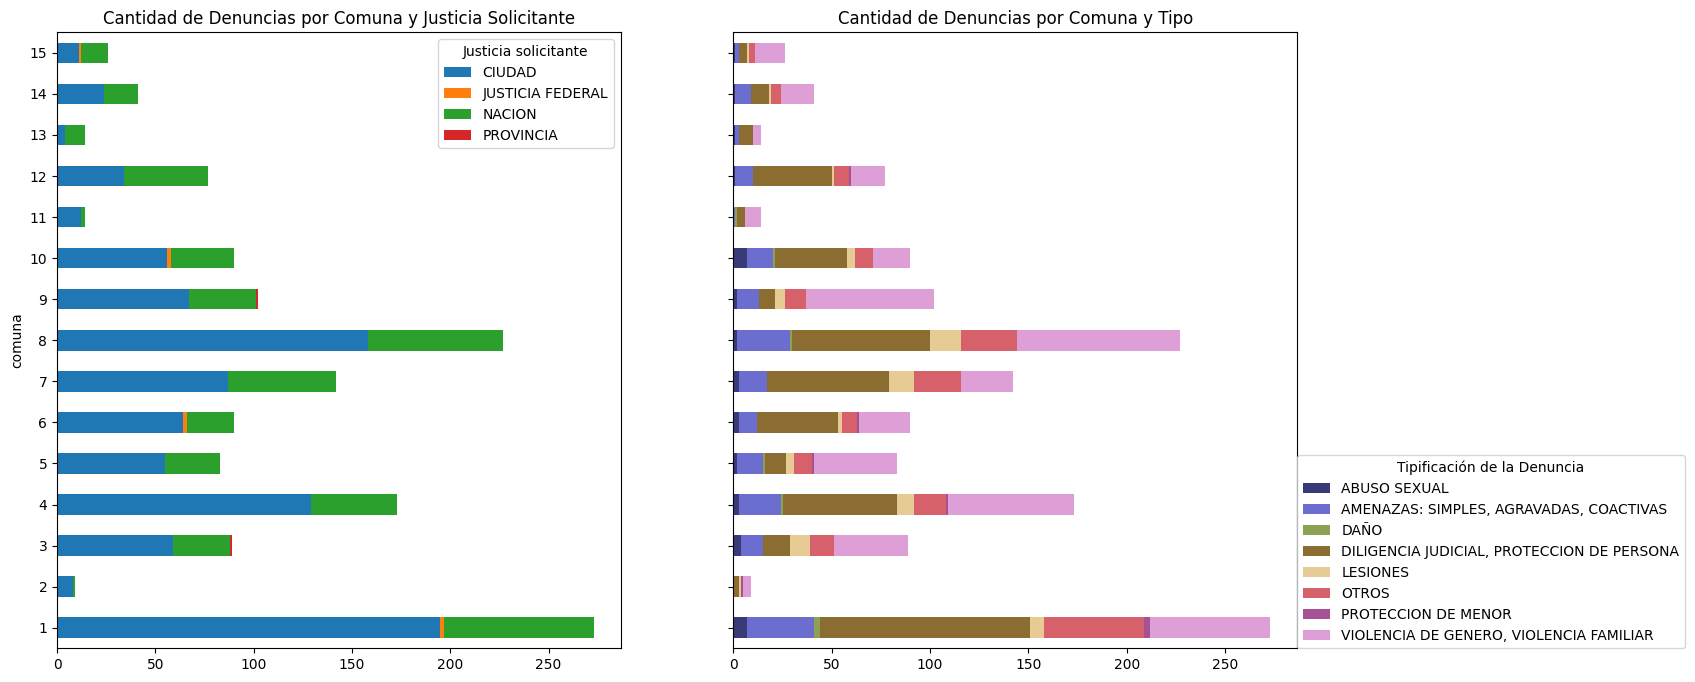

In [37]:
fig, ax = plt.subplots(1,2, figsize=(16,8), sharey=True)

mapa_vdg.groupby(["comuna", "justicia_solicitante"]).size()\
    .unstack().fillna(0).astype(int)\
    .plot(ax=ax[0], kind="barh", stacked=True, title="Cantidad de Denuncias por Comuna y Justicia Solicitante")

mapa_vdg.groupby(["comuna", "tipificacion"]).size()\
    .unstack().fillna(0).astype(int)\
    .plot(ax=ax[1], kind="barh", stacked=True, title="Cantidad de Denuncias por Comuna y Tipo", colormap="tab20b")
ax[1].legend(loc=(1,0), title="Tipificación de la Denuncia")
ax[0].legend(title="Justicia solicitante")


<Axes: title={'center': 'Cantidad de Denuncias por Tipificacion y Modalidad'}, ylabel='tipificacion'>

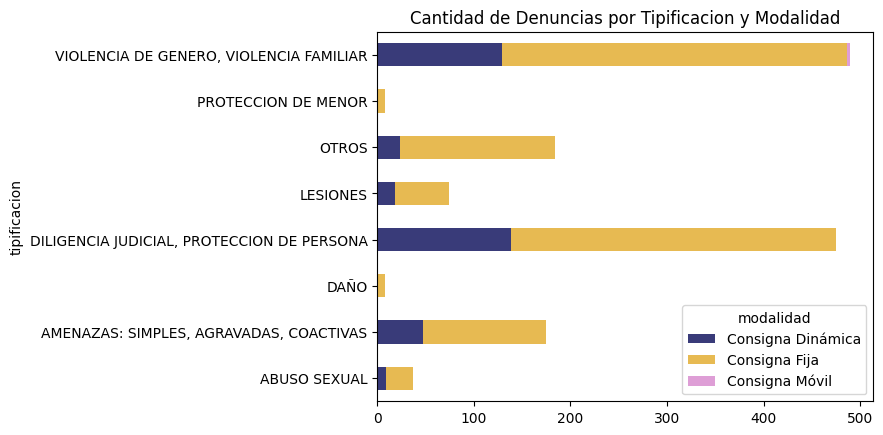

In [38]:
mapa_vdg.modalidad.value_counts(dropna=False, normalize=True)
mapa_vdg.groupby(["tipificacion", "modalidad"]).size()\
    .unstack().fillna(0).astype(int)\
    .plot(kind="barh", stacked=True, title="Cantidad de Denuncias por Tipificacion y Modalidad", colormap="tab20b")

# la distribucion enter Consigna Fija y Dinámica se mantiene en un 75-25 en todos los casos (o mas), por lo que no aporta informacion
# salvo en Protección de Menor y Daño, que son dos tipificaciones minoritarias (aunque cubren maś del 5% de algunas comunas)

In [39]:
mapa_vdg.groupby("comuna").tipificacion.value_counts(normalize=True).unstack().fillna(0)


tipificacion,ABUSO SEXUAL,"AMENAZAS: SIMPLES, AGRAVADAS, COACTIVAS",DAÑO,"DILIGENCIA JUDICIAL, PROTECCION DE PERSONA",LESIONES,OTROS,PROTECCION DE MENOR,"VIOLENCIA DE GENERO, VIOLENCIA FAMILIAR"
comuna,,,,,,,,
1,0.025641,0.124542,0.010989,0.391941,0.025641,0.186813,0.010989,0.223443
2,0.000000,0.000000,0.000000,0.333333,0.111111,0.000000,0.111111,0.444444
3,0.044944,0.123596,0.000000,0.157303,0.112360,0.134831,0.000000,0.426966
4,0.017341,0.121387,0.005780,0.335260,0.052023,0.092486,0.005780,0.369942
5,0.024096,0.156627,0.012048,0.132530,0.048193,0.108434,0.012048,0.506024
6,0.033333,0.100000,0.000000,0.455556,0.022222,0.088889,0.011111,0.288889
7,0.021127,0.098592,0.000000,0.436620,0.091549,0.169014,0.000000,0.183099
8,0.008811,0.118943,0.004405,0.308370,0.070485,0.123348,0.000000,0.365639
9,0.019608,0.107843,0.000000,0.078431,0.049020,0.107843,0.000000,0.637255


In [83]:
mapa_vdg.to_csv(os.path.join(DATA_PROCESSED_PATH, "mapa-violencia-de-genero-2021.csv"), index=False)

## Femicidios

In [69]:
victimas_femicidio = pd.read_csv(os.path.join(DATA_PATH, "vict_fem_annio__g_edad_limpio.csv"), sep=";")
victimas_femicidio.sample()

,2021,2020,2019,2018,2017,2016,2015
0,15,15,5,9,7,14,12


In [71]:
victimas_femicidio

,2021,2020,2019,2018,2017,2016,2015
0,15,15,5,9,7,14,12


In [73]:
tasa_victimas_femicidio = pd.read_csv(os.path.join(DATA_PATH, "tas_femic_annio_limpio.csv"), sep=";")
tasa_victimas_femicidio

,2021,2020,2019,2018,2017,2016,2015
0,0.92,0.92,0.31,0.55,0.43,0.86,0.74


### Dispositivos Antipánicos

In [81]:
dispositivos_antipanico = pd.read_csv(os.path.join(DATA_PATH, "cantidad-de-dispositivos-antipanico.csv"), sep=";")
dispositivos_antipanico[~dispositivos_antipanico.isnull().all(1)] # la mayoria de las filas estan completamente vacias

,Unnamed: 0,TOTAL BOTONES DE PANICO ENTREGADOS,Unnamed: 2,Unnamed: 3,Unnamed: 4,5843
1,NaN,CANTIDAD DE ACCIONAMIENTOS SOS,NaN,NaN,NaN,9041.0


# Comisarías

In [40]:
comisarias = gpd.read_file(os.path.join(DATA_PATH, "comisarias.json"), driver="GeoJSON")
print(f"INFO\n-------------\n{comisarias.info()}")
comisarias.sample(5)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          51 non-null     int64   
 1   nombre      51 non-null     object  
 2   nom_2       11 non-null     object  
 3   nom_3       1 non-null      object  
 4   Designa     51 non-null     object  
 5   Dependenci  51 non-null     object  
 6   Tipo        51 non-null     object  
 7   calle       51 non-null     object  
 8   altura      51 non-null     int64   
 9   calle2      2 non-null      object  
 10  direccion   51 non-null     object  
 11  telefonos   49 non-null     object  
 12  observacio  6 non-null      object  
 13  observac_1  0 non-null      float64 
 14  BARRIO      51 non-null     object  
 15  COMUNAS     51 non-null     int64   
 16  nom_mapa    51 non-null     object  
 17  nom_ante    48 non-null     object  
 18  geometry    51 non-null     geometry
dtypes:

,id,nombre,nom_2,nom_3,Designa,Dependenci,Tipo,calle,altura,calle2,direccion,telefonos,observacio,observac_1,BARRIO,COMUNAS,nom_mapa,nom_ante,geometry
27,4,Comisaría Vecinal 1-B,NaN,NaN,C1B,División,Vecinal,Tacuarí,770,NaN,TACUARI 770,4331-9643 /4342-3333,NaN,NaN,MONSERRAT,1,Comisaría Vecinal 1-B,Comisaría 4,POINT (-58.37858 -34.61716)
50,59,Comisaría Vecinal 9-B,NaN,NaN,C9B,División,Vecinal,Barragán 306 (Bajo autopista),306,NaN,BARRAGAN 306,116 304-9248,(Bajo Autopista),NaN,LINIERS,9,Comisaría Vecinal 9-B,NaN,POINT (-58.52284 -34.63664)
49,58,Comisaría Vecinal 8,NaN,NaN,CC8,División,Comunal,"Cabrera, Delfo",0,23 De Junio,"Cabrera, Delfo y 23 De Junio",2837-0806,NaN,NaN,VILLA SOLDATI,8,Comisaría Comunal 8,NaN,POINT (-58.45559 -34.67298)
10,2,Comisaría Vecinal 1-B (edificio anexo),NaN,NaN,C1B Anexo,División,Vecinal,Perú,1056,NaN,PERU 1056,4307-0537/4361 -8054 /66,NaN,NaN,SAN TELMO,1,Comisaría Vecinal 1-B (edificio anexo),Comisaría 2,POINT (-58.37415 -34.62028)
2,39,Comisaría Vecinal 6-A,NaN,NaN,C6A,División,Vecinal,Díaz Vélez,5152,NaN,DIAZ VELEZ AV. 5152,4982-4509/4520,NaN,NaN,CABALLITO,6,Comisaría Vecinal 6-A,Comisaría 11,POINT (-58.43950 -34.60898)


In [41]:
comisarias.nom_2.value_counts(dropna=False, normalize=True) # 78% nulls
comisarias.nom_3.value_counts(dropna=False, normalize=True) # 98% nulls
comisarias.drop(columns=["nom_2", "nom_3"], inplace=True)

In [42]:
comisarias.rename(mapper=lambda s: s.lower().replace(" ", "_"), axis=1, inplace=True) # standardize column naming

In [43]:
comisarias.id.duplicated().any() # no duplicated ids

False

In [44]:
comisarias.calle2.value_counts(dropna=False, normalize=True) # 96% nulls
comisarias.drop(columns=["calle2"], inplace=True)

<Axes: >

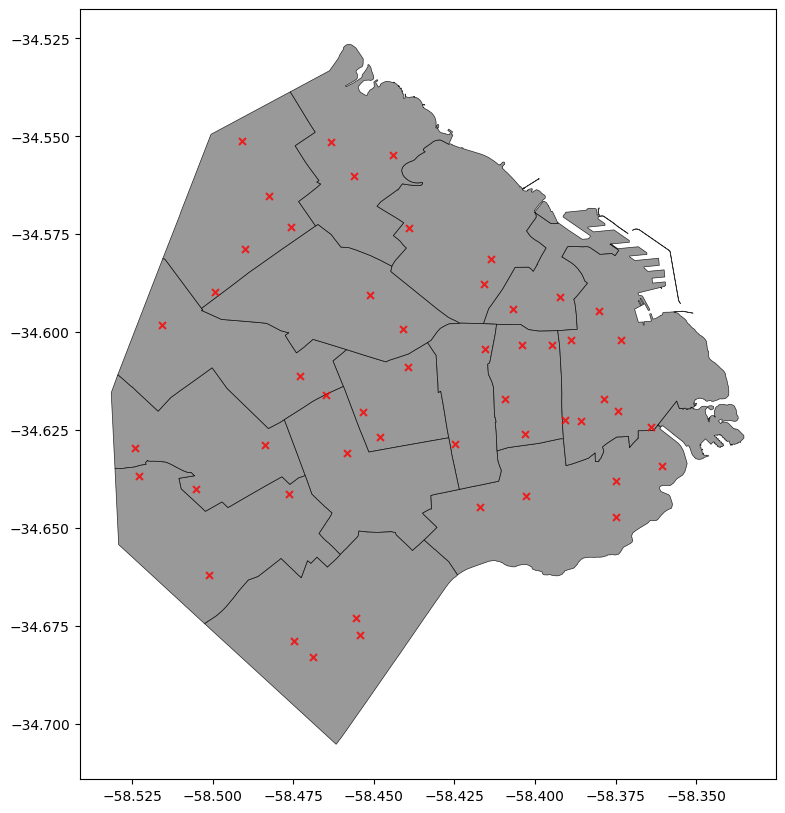

In [45]:
comunas.plot(color="gray", alpha=.8, edgecolor="black", linewidth=.5, figsize=(10,10))
comisarias.plot(ax=plt.gca(), color="red", alpha=.8, markersize=25, marker="x")

## Voronoi para determinar areas de influencia

Clip Voronoi tesselation to CABA boundaries

<Axes: >

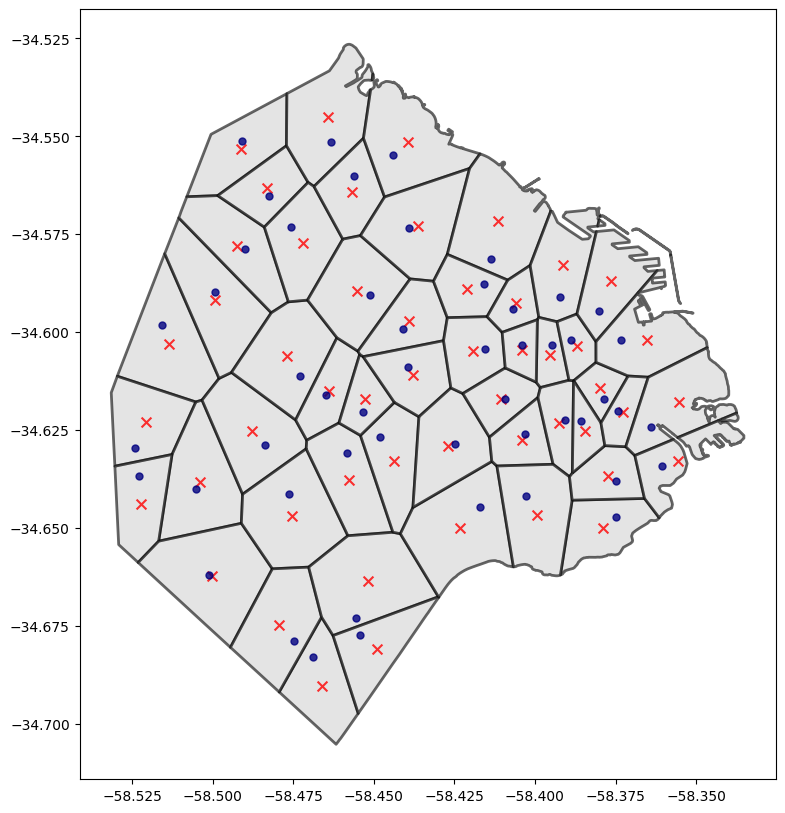

In [46]:
from shapely import MultiLineString, MultiPolygon
from shapely import voronoi_polygons, MultiPoint
from scipy.spatial import Voronoi, voronoi_plot_2d


points = MultiPoint(comisarias.geometry.tolist())
vor = voronoi_polygons(points)

mask = comunas.geometry.unary_union

# compute the difference between the mask and the voronoi lines
diff_pol = []
centroids = []
for p in list(vor.geoms):
    diff_pol.append(mask.intersection(p))
    centroids.append(p.centroid)
# convert the list of polygons to a geodataframe
comisarias_voronoi = gpd.GeoDataFrame({
    "geometry": diff_pol,
    "centroid": centroids
})

comisarias_voronoi.plot(edgecolor="black", color="lightgray", linewidth=2, alpha=.6, figsize=(10,10))
comisarias_voronoi.centroid.plot(ax=plt.gca(), color="red", alpha=.8, markersize=50, marker="x")
comisarias.plot(ax=plt.gca(), color="navy", alpha=.8, markersize=25, marker="o")

In [47]:
comisarias_voronoi["id"] = comisarias_voronoi.centroid.apply(lambda p: comisarias.loc[comisarias.distance(p).idxmin(), "id"])
comisarias_voronoi.sample(5)

/tmp/ipykernel_128223/1411276632.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  comisarias_voronoi["id"] = comisarias_voronoi.centroid.apply(lambda p: comisarias.loc[comisarias.distance(p).idxmin(), "id"])


,geometry,centroid,id
17,"POLYGON ((-58.48216 -34.68985, -58.48216 -34.6...",POINT (-58.52935283249707 -34.74963932334393),25
48,"POLYGON ((-58.37109 -34.61122, -58.36483 -34.6...",POINT (-58.37256381606925 -34.62048951242209),2
19,"POLYGON ((-58.47025 -34.66004, -58.45807 -34.6...",POINT (-58.45186800502356 -34.66351694093638),58
31,"POLYGON ((-58.43151 -34.58701, -58.42721 -34.5...",POINT (-58.42109634465967 -34.58898476643801),34
7,"POLYGON ((-58.45798 -34.70109, -58.45892 -34.7...",POINT (-58.48236998046857 -34.78816100261119),44


<Axes: >

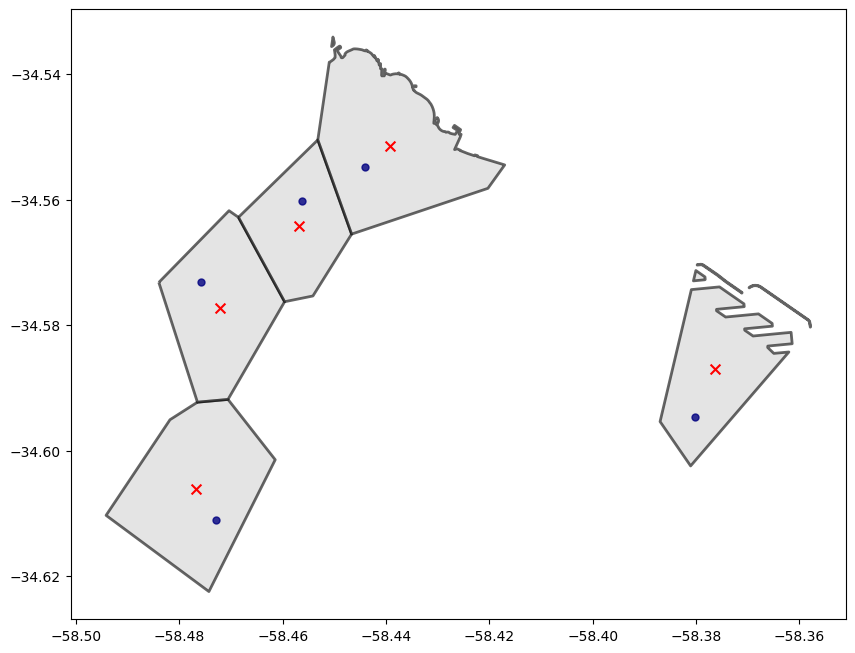

In [49]:
# visually inspect merging
sample_ids = comisarias.id.sample(5).tolist()

comisarias_voronoi[comisarias_voronoi.id.isin(sample_ids)].plot(edgecolor="black", color="lightgray", linewidth=2, alpha=.6, figsize=(10,10))
comisarias_voronoi[comisarias_voronoi.id.isin(sample_ids)].centroid.plot(marker="x", color="red", markersize=50, ax=plt.gca())
comisarias[comisarias.id.isin(sample_ids)].plot(ax=plt.gca(), color="navy", alpha=.8, markersize=25, marker="o")

In [84]:
comisarias.sample()

,id,nombre,designa,dependenci,tipo,calle,altura,direccion,telefonos,observacio,observac_1,barrio,comunas,nom_mapa,nom_ante,geometry
12,34,Comisaría Vecinal 14-A,C14A,División,Vecinal,Julián Álvarez,2373,"ALVAREZ, JULIAN 2373",4821-5056 / 4823-3333,NaN,NaN,PALERMO,14,Comisaría Vecinal 14-A,Comisaría 21,POINT (-58.41593 -34.58773)


In [85]:
comisarias_voronoi.sample()

,geometry,centroid,id
28,"POLYGON ((-58.44364 -34.61795, -58.45334 -34.6...",POINT (-58.43773890432313 -34.61103854618504),39


In [86]:
comisarias.id.duplicated().any()

False

In [87]:
comisarias = comisarias.merge(comisarias_voronoi, on="id", how="left")
comisarias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          51 non-null     int64   
 1   nombre      51 non-null     object  
 2   designa     51 non-null     object  
 3   dependenci  51 non-null     object  
 4   tipo        51 non-null     object  
 5   calle       51 non-null     object  
 6   altura      51 non-null     int64   
 7   direccion   51 non-null     object  
 8   telefonos   49 non-null     object  
 9   observacio  6 non-null      object  
 10  observac_1  0 non-null      float64 
 11  barrio      51 non-null     object  
 12  comunas     51 non-null     int64   
 13  nom_mapa    51 non-null     object  
 14  nom_ante    48 non-null     object  
 15  geometry_x  51 non-null     geometry
 16  geometry_y  51 non-null     geometry
 17  centroid    51 non-null     object  
dtypes: float64(1), geometry(2), int64(3), object(12)
mem

In [88]:
comisarias.rename(columns={
    "geometry_x": "geometry_comisaria",
    "geometry_y": "geometry_voronoi",
    "centroid": "geometry_voronoi_centroid"
}, inplace=True)

In [89]:
comisarias.to_csv(os.path.join(DATA_PROCESSED_PATH, "comisarias.csv"), index=False)

# Cambio de Hábitos

In [53]:
habitos = pd.read_csv(os.path.join(DATA_PATH, "tip_hab_modif_sexo__annio__g_edad__hab_modif_limpio.csv"), encoding="latin1")
print(habitos.info())
habitos.sample()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   anio                 144 non-null    int64  
 1   sexo                 144 non-null    object 
 2   porc_poblacion       144 non-null    float64
 3   grupo_edad           144 non-null    object 
 4   habitos_modificados  144 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 5.8+ KB
None


,anio,sexo,porc_poblacion,grupo_edad,habitos_modificados
120,2017,v,27.497997,35 - 64,Ha dejado de salir de noche


In [55]:
habitos.head(10)

,anio,sexo,porc_poblacion,grupo_edad,habitos_modificados
0,2017,TOTAL,35.963920,TOTAL,Ha dejado de salir de noche
1,2017,TOTAL,59.241007,TOTAL,Ha dejado de llevar mucho dinero en efectivo o...
2,2017,TOTAL,40.738390,TOTAL,Ha dejado de llegar muy tarde a casa o dejar l...
3,2017,TOTAL,16.755717,TOTAL,"Ha dejado de ir al cine, al teatro, a recitale..."
4,2017,TOTAL,21.240256,TOTAL,"Ha dejado de salir a caminar, correr o andar e..."
5,2017,TOTAL,7.649822,TOTAL,Ha dejado de usar transporte pÃºblico
6,2017,TOTAL,25.963244,TOTAL,Ha dejado de tomar taxis en la calle
7,2017,TOTAL,23.208821,TOTAL,Ha dejado de visitar parientes o amigos
8,2017,TOTAL,8.992866,TOTAL,Ha dejado de frecuentar centros comerciales
9,2017,TOTAL,6.528008,TOTAL,Ha dejado de viajar por ruta o autopista


In [56]:
habitos.sexo.value_counts(dropna=True, normalize=True)

TOTAL    0.333333
m        0.333333
v        0.333333
Name: sexo, dtype: float64

In [58]:
habitos.grupo_edad.value_counts(dropna=True, normalize=True)

TOTAL        0.25
18 - 34      0.25
35 - 64      0.25
65 y mÃ¡s    0.25
Name: grupo_edad, dtype: float64

In [59]:
habitos.habitos_modificados.value_counts(dropna=True, normalize=True)

Ha dejado de salir de noche                                                      0.083333
Ha dejado de llevar mucho dinero en efectivo o tarjetas de crÃ©dito o dÃ©bito    0.083333
Ha dejado de llegar muy tarde a casa o dejar la casa sola                        0.083333
Ha dejado de ir al cine, al teatro, a recitales, a comer afuera                  0.083333
Ha dejado de salir a caminar, correr o andar en bicicleta                        0.083333
Ha dejado de usar transporte pÃºblico                                            0.083333
Ha dejado de tomar taxis en la calle                                             0.083333
Ha dejado de visitar parientes o amigos                                          0.083333
Ha dejado de frecuentar centros comerciales                                      0.083333
Ha dejado de viajar por ruta o autopista                                         0.083333
Ha dejado de ir a la cancha                                                      0.083333
Ha dejado 

In [63]:
habitos.porc_poblacion = habitos.porc_poblacion / 100

In [64]:
habitos.sample(4)

,anio,sexo,porc_poblacion,grupo_edad,habitos_modificados
24,2017,TOTAL,0.375650,35 - 64,Ha dejado de salir de noche
71,2017,m,0.575926,18 - 34,"Ha dejado de usar joyas, relojes u objetos de ..."
123,2017,v,0.152525,35 - 64,"Ha dejado de ir al cine, al teatro, a recitale..."
137,2017,v,0.033257,65 y mÃ¡s,Ha dejado de usar transporte pÃºblico


In [66]:
habitos.anio.value_counts(dropna=True, normalize=True)

2017    1.0
Name: anio, dtype: float64